In [7]:
import pymc as pm
import pandas as pd
import numpy as np


In [9]:
pymc_data = pd.read_csv('pymc_data.csv')
pymc_data

,Unnamed: 0,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,...,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome,Tissue_Type4,Cell_Type,Gender,Organism,Tissue_Type2
0,0,1.924410,0.109107,4.242641,3.736675,3.000000,2.284457,1.362372,0.846353,0.000000,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
1,1,2.177023,0.403231,3.698671,3.399812,2.431852,2.047981,1.363590,0.857711,6.103966,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
2,2,1.922504,-0.139241,5.698671,4.108675,3.308060,3.146314,1.499386,0.872272,11.936972,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
3,3,2.205510,-0.139476,19.484917,16.150097,13.206239,9.630856,6.608818,4.684262,18.097893,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
4,4,2.523313,-0.284401,94.695390,69.864432,63.006231,42.504605,33.156017,23.720044,6.420822,...,0,4,4,2,0.0,Normal,epithelial,F,Human,kidney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,595,2.154662,-0.677602,23.915638,21.649627,16.558551,12.913634,9.648123,7.105428,0.000000,...,0,0,0,7,1.0,Primary,epithelial,F,Animal cell,pituitary gland
196,596,2.218270,-0.655248,16.681434,14.037838,11.685872,8.184650,6.040499,4.534872,0.000000,...,0,0,0,0,1.0,Primary,epithelial,F,Animal cell,pituitary gland
197,597,2.238838,0.242258,16.654336,13.107152,10.091243,7.616314,7.049973,3.379645,22.350255,...,0,0,0,0,1.0,Primary,epithelial,F,Animal cell,pituitary gland
198,598,2.224200,0.402149,14.819626,12.343412,10.147867,8.331172,7.010513,4.940160,0.000000,...,0,0,0,0,1.0,Primary,epithelial,F,Animal cell,pituitary gland


In [15]:
assay_info = pymc_data.iloc[:, 54:]
# assay_info['assay_name'] = pymc_data['assay_name']
# assay_info
pymc_data.columns

Index(['Unnamed: 0', 'BCUT2D_CHGHI', 'BCUT2D_MRLOW', 'Chi0', 'Chi0n', 'Chi1',
       'Chi1v', 'Chi2v', 'Chi3v', 'EState_VSA3', 'EState_VSA6', 'EState_VSA7',
       'ExactMolWt', 'FractionCSP3', 'HeavyAtomMolWt', 'Kappa2', 'LabuteASA',
       'MaxPartialCharge', 'MolWt', 'NOCount', 'NumAromaticRings',
       'NumHeteroatoms', 'NumSaturatedCarbocycles', 'PEOE_VSA1', 'PEOE_VSA12',
       'PEOE_VSA13', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA9', 'SMR_VSA1',
       'SMR_VSA5', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA4', 'VSA_EState10',
       'VSA_EState2', 'VSA_EState3', 'VSA_EState5', 'VSA_EState7',
       'VSA_EState9', 'ProtocolName', 'fr_Ar_OH', 'fr_NH0', 'fr_aniline',
       'fr_benzene', 'fr_halogen', 'fr_ketone', 'fr_nitro', 'fr_nitro_arom',
       'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_unbrch_alkane', 'outcome',
       'Tissue_Type4', 'Cell_Type', 'Gender', 'Organism', 'Tissue_Type2'],
      dtype='object')

In [16]:
assay_info

,Cell_Type,Gender,Organism,Tissue_Type2
0,epithelial,F,Human,kidney
1,epithelial,F,Human,kidney
2,epithelial,F,Human,kidney
3,epithelial,F,Human,kidney
4,epithelial,F,Human,kidney
...,...,...,...,...
195,epithelial,F,Animal cell,pituitary gland
196,epithelial,F,Animal cell,pituitary gland
197,epithelial,F,Animal cell,pituitary gland
198,epithelial,F,Animal cell,pituitary gland


### Jaleal's code

In [19]:
tox21_two_assays = pymc_data.iloc[:, 1:53]
tox21_two_assays.columns

Index(['BCUT2D_CHGHI', 'BCUT2D_MRLOW', 'Chi0', 'Chi0n', 'Chi1', 'Chi1v',
       'Chi2v', 'Chi3v', 'EState_VSA3', 'EState_VSA6', 'EState_VSA7',
       'ExactMolWt', 'FractionCSP3', 'HeavyAtomMolWt', 'Kappa2', 'LabuteASA',
       'MaxPartialCharge', 'MolWt', 'NOCount', 'NumAromaticRings',
       'NumHeteroatoms', 'NumSaturatedCarbocycles', 'PEOE_VSA1', 'PEOE_VSA12',
       'PEOE_VSA13', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA9', 'SMR_VSA1',
       'SMR_VSA5', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA4', 'VSA_EState10',
       'VSA_EState2', 'VSA_EState3', 'VSA_EState5', 'VSA_EState7',
       'VSA_EState9', 'ProtocolName', 'fr_Ar_OH', 'fr_NH0', 'fr_aniline',
       'fr_benzene', 'fr_halogen', 'fr_ketone', 'fr_nitro', 'fr_nitro_arom',
       'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_unbrch_alkane', 'outcome'],
      dtype='object')

In [26]:
organism = ['human' for i in range(tox21_two_assays.shape[0])] + ['mouse' for i in range(tox21_two_assays.shape[0])]
new_protocol = [i + '-' + v for i,v in zip(pd.concat([tox21_two_assays['ProtocolName'],tox21_two_assays['ProtocolName']]),organism)]
tox21_two_assays['outcome'].value_counts()
tox21_two_assays

,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,EState_VSA6,...,fr_aniline,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome
0,1.924410,0.109107,4.242641,3.736675,3.000000,2.284457,1.362372,0.846353,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
1,2.177023,0.403231,3.698671,3.399812,2.431852,2.047981,1.363590,0.857711,6.103966,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
2,1.922504,-0.139241,5.698671,4.108675,3.308060,3.146314,1.499386,0.872272,11.936972,6.923737,...,0,0,1,0,0,0,0,0,0,0.0
3,2.205510,-0.139476,19.484917,16.150097,13.206239,9.630856,6.608818,4.684262,18.097893,0.000000,...,0,2,0,0,0,0,0,0,0,0.0
4,2.523313,-0.284401,94.695390,69.864432,63.006231,42.504605,33.156017,23.720044,6.420822,6.076020,...,0,7,2,0,0,0,4,4,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.154662,-0.677602,23.915638,21.649627,16.558551,12.913634,9.648123,7.105428,0.000000,0.000000,...,2,2,2,0,0,0,0,0,7,1.0
196,2.218270,-0.655248,16.681434,14.037838,11.685872,8.184650,6.040499,4.534872,0.000000,0.000000,...,2,3,1,0,0,0,0,0,0,1.0
197,2.238838,0.242258,16.654336,13.107152,10.091243,7.616314,7.049973,3.379645,22.350255,6.066367,...,0,1,2,0,0,0,0,0,0,1.0
198,2.224200,0.402149,14.819626,12.343412,10.147867,8.331172,7.010513,4.940160,0.000000,0.000000,...,2,2,1,0,0,0,0,0,0,1.0


In [28]:
simulated_two_assays = tox21_two_assays.copy()
BCUT2D_CHGHI_scale = (simulated_two_assays['BCUT2D_CHGHI'] - simulated_two_assays['BCUT2D_CHGHI'].min()) / (simulated_two_assays['BCUT2D_CHGHI'].max() - simulated_two_assays['BCUT2D_CHGHI'].min())
BCUT2D_CHGHI_scale


0      0.313787
1      0.520389
2      0.312228
3      0.543687
4      0.803606
         ...   
195    0.502100
196    0.554123
197    0.570945
198    0.558973
199    0.716888
Name: BCUT2D_CHGHI, Length: 200, dtype: float64

In [31]:
import random
new_outcome = []
for i,v in zip(simulated_two_assays['outcome'],BCUT2D_CHGHI_scale/10.0):
    rv = random.random()
    if i == "inactive":
        if (rv + v)>1:
            print((i,v,rv,rv+v))
            new_outcome.append('active antagonist')
        else:
            new_outcome.append(i)
    else:
        if (rv + v)<0.1:
            print((i,v,rv,rv+v))
            new_outcome.append('inactive')
        else:
            new_outcome.append(i)

simulated_two_assays['outcome'] = new_outcome
simulated_two_assays['outcome'].value_counts()

(0.0, 0.049020500143486474, 0.008274532223499609, 0.05729503236698608)
(0.0, 0.057581054111610665, 0.008514675371059766, 0.06609572948267042)
(1.0, 0.04849008138900092, 0.016802206539934472, 0.06529228792893539)
(1.0, 0.05886075245720004, 0.010830381285033996, 0.06969113374223404)


0.0         98
1.0         98
inactive     4
Name: outcome, dtype: int64

In [32]:
four_assay_simulated = pd.concat([tox21_two_assays,simulated_two_assays])
four_assay_simulated['PROTOCOL_NAME'] = new_protocol
four_assay_simulated.insert(2,'ORGANISM',organism)
four_assay_simulated.reset_index(drop=True,inplace=True)
four_assay_simulated.head()


,BCUT2D_CHGHI,BCUT2D_MRLOW,ORGANISM,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,...,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome,PROTOCOL_NAME
0,1.924410,0.109107,human,4.242641,3.736675,3.000000,2.284457,1.362372,0.846353,0.000000,...,0,0,0,0,0,0,0,0,0.0,tox21-ar-bla-antagonist-p1-human
1,2.177023,0.403231,human,3.698671,3.399812,2.431852,2.047981,1.363590,0.857711,6.103966,...,0,0,0,0,0,0,0,0,0.0,tox21-ar-bla-antagonist-p1-human
2,1.922504,-0.139241,human,5.698671,4.108675,3.308060,3.146314,1.499386,0.872272,11.936972,...,0,1,0,0,0,0,0,0,0.0,tox21-ar-bla-antagonist-p1-human
3,2.205510,-0.139476,human,19.484917,16.150097,13.206239,9.630856,6.608818,4.684262,18.097893,...,2,0,0,0,0,0,0,0,0.0,tox21-ar-bla-antagonist-p1-human
4,2.523313,-0.284401,human,94.695390,69.864432,63.006231,42.504605,33.156017,23.720044,6.420822,...,7,2,0,0,0,4,4,2,0.0,tox21-ar-bla-antagonist-p1-human


In [33]:
four_assay_simulated.tail()

,BCUT2D_CHGHI,BCUT2D_MRLOW,ORGANISM,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,...,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome,PROTOCOL_NAME
395,2.154662,-0.677602,mouse,23.915638,21.649627,16.558551,12.913634,9.648123,7.105428,0.000000,...,2,2,0,0,0,0,0,7,1.0,tox21-gh3-tre-antagonist-p1-mouse
396,2.218270,-0.655248,mouse,16.681434,14.037838,11.685872,8.184650,6.040499,4.534872,0.000000,...,3,1,0,0,0,0,0,0,1.0,tox21-gh3-tre-antagonist-p1-mouse
397,2.238838,0.242258,mouse,16.654336,13.107152,10.091243,7.616314,7.049973,3.379645,22.350255,...,1,2,0,0,0,0,0,0,1.0,tox21-gh3-tre-antagonist-p1-mouse
398,2.224200,0.402149,mouse,14.819626,12.343412,10.147867,8.331172,7.010513,4.940160,0.000000,...,2,1,0,0,0,0,0,0,1.0,tox21-gh3-tre-antagonist-p1-mouse
399,2.417284,-0.133019,mouse,39.630817,31.402858,25.357196,20.166884,16.906160,9.673452,30.153038,...,2,0,0,0,0,0,0,0,1.0,tox21-gh3-tre-antagonist-p1-mouse


In [34]:
simulated_protocols = pd.factorize(four_assay_simulated.PROTOCOL_NAME)
#To busy to figure out the right way to do this
organisms = [0,0,1,1]
X4_bayes = four_assay_simulated[['BCUT2D_CHGHI', 'BCUT2D_MRLOW','Chi0']]
X4_bayes.insert(0,'Intercept',1)
X4_bayes = np.asarray(X4_bayes)
Y4_bayes = pd.factorize(four_assay_simulated.outcome)
coords_simulated = {
    'obs_id': np.arange(X4_bayes.shape[0]),
    'protocol':list(simulated_protocols[1]),
    'params':['beta_{0}'.format(i) for i in range(X4_bayes.shape[1])]
}

In [35]:
X4_bayes

array([[ 1.        ,  1.92440972,  0.10910674,  4.24264069],
       [ 1.        ,  2.17702293,  0.40323058,  3.69867061],
       [ 1.        ,  1.92250447, -0.13924101,  5.69867061],
       ...,
       [ 1.        ,  2.2388382 ,  0.24225764, 16.65433606],
       [ 1.        ,  2.22419979,  0.40214861, 14.81962648],
       [ 1.        ,  2.41728373, -0.13301888, 39.63081679]])

In [38]:
coords_simulated

{'obs_id': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175

In [40]:
import aesara.tensor as T
#https://docs.pymc.io/en/v3/pymc-examples/examples/case_studies/multilevel_modeling.html
with pm.Model(coords=coords_simulated) as assay_level_model:
    protocol_idx = pm.Data("protocol_idx", list(simulated_protocols[0]),dims='obs_id')
    organism_idx = pm.Data("organism_idx", organisms, dims="protocol")
    
    # prior stddev in intercepts & slopes (variation across protocol):
    sd_dist = pm.Exponential.dist(1)
    
    # get back standard deviations and rho:
    chol, corr, stds = pm.LKJCholeskyCov("chol", n=X4_bayes.shape[1], eta=2.0, sd_dist=sd_dist, compute_corr=True)
    
    #hyperpriors and priors for average betas:
    beta_list = []
    for i in range(X4_bayes.shape[1]):
        gbeta = pm.Normal("g_beta_{0}".format(i), mu=0.0, sigma=10.0, shape=2)
        mu_gbeta = gbeta[0] + gbeta[1] * organism_idx
        beta_list.append(pm.Normal('beta_{0}'.format(i), mu=mu_gbeta,sigma=3.0,dims="protocol"))
    
    #population of varying protocol effects:
    beta_protocol = pm.MvNormal("beta_protocol", mu=T.stack(beta_list), chol=chol,dims=('protocol','params'))
    
    #Expected value per protocol:
    theta = beta_protocol[protocol_idx,0]* X4_bayes[:,0]
    for i in range(1,X4_bayes.shape[1]):
        theta += beta_protocol[protocol_idx,i] * X4_bayes[:,i]

    p = 1.0 / (1.0 + T.exp(-theta ))
    likelihood = pm.Bernoulli('likelihood', p, observed=Y4_bayes[0],dims="obs_id")

/opt/anaconda3/lib/python3.9/site-packages/pymc/data.py:667: FutureWarning: The `mutable` kwarg was not specified. Currently it defaults to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default will change to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Set `pm.Data(..., mutable=False/True)`, or use `pm.ConstantData`/`pm.MutableData`.
  warnings.warn(


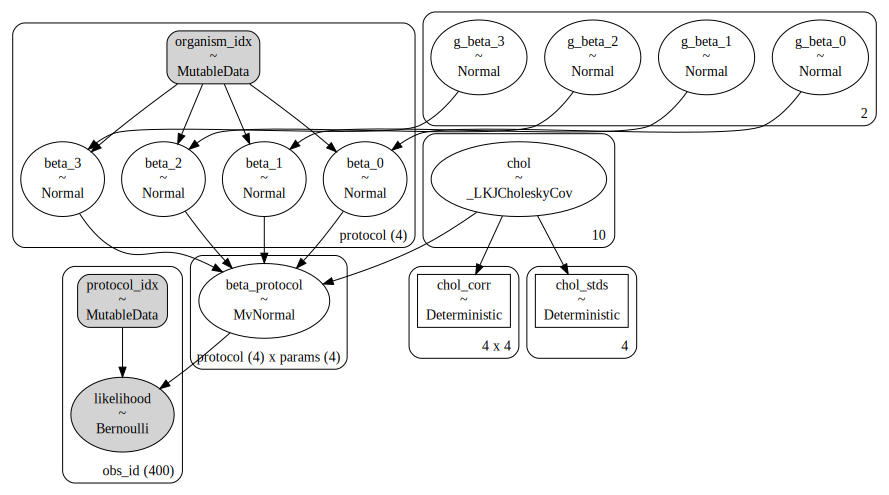

In [42]:

pm.model_to_graphviz(assay_level_model)